# EDA

In [25]:
%pip install -r requirements.txt

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/07/0b/9a0818be42f6689ebdc7a2277ea984d6299f0809d0e0277128df4f7dc606/statsmodels-0.14.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data

Some notes on the weather data:  
`QV2M` - Specific humidity at 2 meters  
`T2M` - Temperature at 2 meters  
`T2MWET` - Wet bulb temeprature at 2 meters  
`WS2M` - Wind speed at 2 meters  
`ALLSKY_SFC_UV_INDEX` - All sky surface UV index  
`T2MDEW` - Dew/frost point at 2 meters  
`TS` - Earth skin temperature  
`ALLSKY_SFC_UVB` - All sky surface UVB irradiance  
`T2M_RANGE` - Temperature at 2 meters range  
`RH2M` - Relative humidity at 2 meters  
`CLRSKY_SFC_SW_DWN` - Clear sky surface shortwave downward irradiance  

In [6]:
PATH = r'/Users/asmit/Documents/Fall24_Classes/SDS336/Austin_Trees/weather_data/'
weather = pd.DataFrame()
files = os.listdir(PATH)

# Read each file
for file in files:
    weather = pd.concat([weather, pd.read_csv(PATH + file)])

# Check that expected matches actual
weather.reset_index(inplace=True)
expected_row_count = 2808 * weather['YYYYMMDD'].nunique() # Num of pulls/day * num of days
weather['YYYYMMDD'] = pd.to_datetime(weather['YYYYMMDD'], format='ISO8601')
weather = weather.drop(columns=['index'])
print(f'Read {len(files)} files | Expected {expected_row_count} rows')
print(f'Shape: {weather.shape}')
weather.head()

Read 695 files | Expected 1959984 rows
Shape: (1959984, 19)


,LON,LAT,YEAR,MM,DD,DOY,YYYYMMDD,QV2M,T2M,T2MWET,WS2M,ALLSKY_SFC_UV_INDEX,T2MDEW,TS,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M_RANGE,RH2M,CLRSKY_SFC_SW_DWN
0,-97.697313,30.251707,2015,6,24,175,2015-06-24,17.03,26.70,24.52,1.42,2.66,22.34,27.08,0.52,19.44,9.66,78.94,8.09
1,-97.672401,30.328069,2015,6,24,175,2015-06-24,17.03,26.70,24.52,1.42,2.66,22.34,27.08,0.52,19.44,9.66,78.94,8.09
2,-97.721013,30.236494,2015,6,24,175,2015-06-24,17.76,26.44,24.79,1.30,2.66,23.14,26.65,0.52,19.44,8.52,83.25,8.09
3,-97.719236,30.373732,2015,6,24,175,2015-06-24,17.03,26.70,24.52,1.42,2.66,22.34,27.08,0.52,19.44,9.66,78.94,8.09
4,-97.740475,30.279196,2015,6,24,175,2015-06-24,17.03,26.70,24.52,1.42,2.66,22.34,27.08,0.52,19.44,9.66,78.94,8.09


## Basic EDA

Checking dtypes, missing values, summary statistics

In [28]:
weather.dtypes

LON                           float64
LAT                           float64
YEAR                            int64
MM                              int64
DD                              int64
DOY                             int64
YYYYMMDD               datetime64[ns]
QV2M                          float64
T2M                           float64
T2MWET                        float64
WS2M                          float64
ALLSKY_SFC_UV_INDEX           float64
T2MDEW                        float64
TS                            float64
ALLSKY_SFC_UVB                float64
ALLSKY_SFC_UVA                float64
T2M_RANGE                     float64
RH2M                          float64
CLRSKY_SFC_SW_DWN             float64
dtype: object

In [7]:
weather.isnull().sum()

LON                         0
LAT                         0
YEAR                        0
MM                          0
DD                          0
DOY                         0
YYYYMMDD                    0
QV2M                        0
T2M                         0
T2MWET                      0
WS2M                        0
ALLSKY_SFC_UV_INDEX    106704
T2MDEW                      0
TS                          0
ALLSKY_SFC_UVB          47736
ALLSKY_SFC_UVA          47736
T2M_RANGE                   0
RH2M                        0
CLRSKY_SFC_SW_DWN       36504
dtype: int64

In [12]:
# Low proportion of NA values, impute with median for now
weather = weather.fillna(weather.median())

In [32]:
# No need to look at some columns
weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']).describe() # Drop geo/date-related cols

,QV2M,T2M,T2MWET,WS2M,ALLSKY_SFC_UV_INDEX,T2MDEW,TS,ALLSKY_SFC_UVB,ALLSKY_SFC_UVA,T2M_RANGE,RH2M,CLRSKY_SFC_SW_DWN
count,174096.000000,174096.000000,174096.000000,174096.000000,134784.000000,174096.000000,174096.000000,140400.000000,140400.000000,174096.000000,174096.000000,146016.000000
mean,13.746822,26.902507,22.360760,2.833357,2.098542,17.821029,28.078880,0.407400,15.096800,12.672400,63.630671,7.178846
std,4.072527,5.308416,4.979564,1.144706,0.643800,5.829894,5.871277,0.115062,3.709923,3.628676,15.531523,0.682032
min,3.110000,12.210000,4.850000,1.030000,0.600000,-2.910000,12.770000,0.120000,4.700000,3.160000,24.440000,5.590000
25%,10.930000,24.420000,20.710000,1.950000,1.632500,15.050000,24.900000,0.330000,12.330000,10.110000,51.690000,6.702500
50%,14.340000,27.720000,24.230000,2.550000,1.990000,19.400000,28.760000,0.390000,15.585000,13.170000,64.440000,7.200000
75%,16.420000,31.420000,25.730000,3.550000,2.562500,21.680000,33.490000,0.500000,18.350000,15.420000,76.620000,7.795000
max,21.480000,35.140000,27.760000,6.400000,3.440000,26.060000,38.120000,0.620000,20.570000,19.590000,93.120000,8.380000


<Axes: >

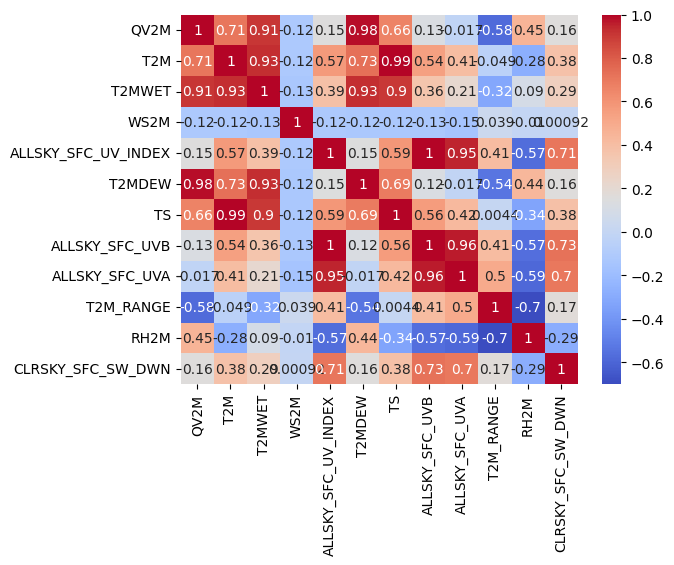

In [8]:
corr = weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Figure size 1000x600 with 0 Axes>

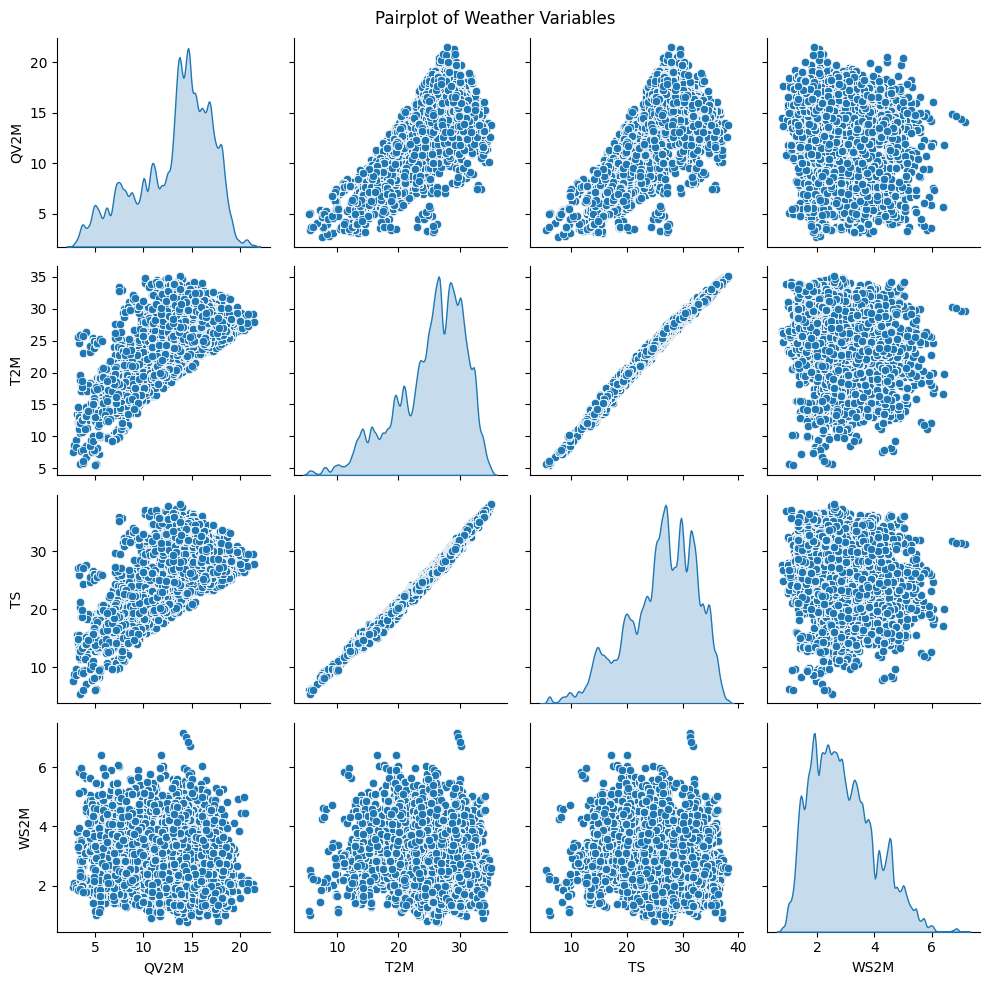

In [9]:
plt.figure(figsize=(10, 6))
p = sns.pairplot(weather[['QV2M', 'T2M', 'TS', 'WS2M']], diag_kind='kde')
p.fig.suptitle('Pairplot of Weather Variables')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from collections import Counter

# Dictionary to store the occurrences of component counts
component_occurrences = Counter()

components_per_date = {}
filtered_components_per_date = {}
explained_variance_threshold = 0.95

for date, group in weather.groupby('YYYYMMDD'):
    # Drop date and location cols
    features = group.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD'])
    
    # Standardize
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
    
    # Do PCA
    pca = PCA()
    pca.fit(standardized_features)

    # Get number of components for 95% variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    num_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
    components_per_date[date] = num_components
    
    # Update occurrences of the component count
    component_occurrences[num_components] += 1

# Display the occurrences of each component count
print("Occurrences of Component Counts for 95% Variance Retention:")
for num_components, count in component_occurrences.items():
    print(f"{num_components} components: {count} occurrences")

Occurrences of Component Counts for 95% Variance Retention:
2 components: 628 occurrences
3 components: 60 occurrences
1 components: 10 occurrences


In [ ]:

# Calculate Procrustes distances between PCA loadings of each date pair with filtered data
procrustes_filtered_results = []

filtered_dates = list(filtered_components_per_date.keys())
for i in range(len(filtered_dates)):
    for j in range(i + 1, len(filtered_dates)):
        date1, date2 = filtered_dates[i], filtered_dates[j]
        loadings1 = filtered_components_per_date[date1]
        loadings2 = filtered_components_per_date[date2]
        
        # Check if the loadings have the same shape (which should be the case now)
        if loadings1.shape == loadings2.shape:
            _, _, disparity = procrustes(loadings1, loadings2)
            procrustes_filtered_results.append((date1, date2, disparity))

# Convert results to a DataFrame for inspection
procrustes_filtered_df = pd.DataFrame(procrustes_filtered_results, columns=['Date1', 'Date2', 'Procrustes_Disparity'])

procrustes_filtered_df.head()

In [20]:
# Drop date and location cols
features = weather.drop(columns=['LON', 'LAT', 'YEAR', 'MM', 'DD', 'DOY', 'YYYYMMDD'])

# Standardize
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Do PCA
pca = PCA()
pca.fit(standardized_features)

# Get number of components for 95% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= explained_variance_threshold) + 1
num_components
# Print variance per component in a pritn statement
print(f'Number of components for 95% variance: {num_components}')
print('Variance per component:')
print(pca.explained_variance_ratio_)

Number of components for 95% variance: 5
Variance per component:
[4.57646562e-01 3.20315129e-01 8.37338351e-02 8.01414147e-02
 2.73223107e-02 2.40526774e-02 3.52632055e-03 1.86719817e-03
 6.65061850e-04 4.92071919e-04 2.37379842e-04 3.86237625e-08]


# PIVOT

In [31]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Drop date and location columns
features = weather[['T2M', 'WS2M', 'CLRSKY_SFC_SW_DWN', 'QV2M']]

# Standardize the features (important for VIF calculation accuracy)
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Convert back to DataFrame for ease of use
standardized_df = pd.DataFrame(standardized_features, columns=features.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = standardized_df.columns
vif_data['VIF'] = [variance_inflation_factor(standardized_df.values, i) for i in range(standardized_df.shape[1])]

# Display the VIF values
print(vif_data.sort_values(by='VIF', ascending=False))

             Feature       VIF
0                T2M  2.358334
3               QV2M  2.073288
2  CLRSKY_SFC_SW_DWN  1.200208
1               WS2M  1.019243
